In [5]:
from ocpmodels.datasets import LmdbDataset as LD
import matplotlib.pyplot as plt
import pickle
import numpy as np
import pandas as pd
from tqdm import tqdm
import re
import warnings
warnings.filterwarnings("ignore")

## The following code shows how the results are collected from the inference npz files. Please, proceed to the bottom of the notebook to see results directly. 

## Total Energy (old settings)

In [2]:
dataset = LD({"src": "/home/jovyan/shared-scratch/kabdelma/oc20_data_quality_project/s2ef_200k_experiment/lmdbs/total_energy/val_30k/old_dft_data_all"})
sids = []
fids = []
energies = []
for i in tqdm(range(len(dataset))):
    data = dataset[i]
    sids.append(data['sid'].item())
    fids.append(data['fid'].item())
    energies.append(data['y'])

## make a dataframe
df_old_dft_total = pd.DataFrame({'sid': sids, 'fid': fids, 'old_total_energy': energies})

  0%|          | 0/29627 [00:00<?, ?it/s]

100%|██████████| 29627/29627 [00:30<00:00, 957.19it/s]


In [3]:
dataset = LD({"src": "/home/jovyan/shared-scratch/kabdelma/oc20_data_quality_project/s2ef_200k_experiment/lmdbs/total_energy/val_30k/new_dft_data_all"})
sids = []
fids = []
energies = []
for i in tqdm(range(len(dataset))):
    data = dataset[i]
    sids.append(data['sid'].item())
    fids.append(data['fid'].item())
    energies.append(data['y'])

## make a dataframe
df_new_dft_total = pd.DataFrame({'sid': sids, 'fid': fids, 'new_total_energy': energies})

100%|██████████| 29627/29627 [00:30<00:00, 959.52it/s]


In [4]:
## merge the two dataframes
df_total = df_old_dft_total.merge(df_new_dft_total, on = ['sid', 'fid'])

In [5]:
pred_path = "/home/jovyan/shared-scratch/kabdelma/oc20_data_quality_project/s2ef_200k_experiment/results/2024-07-07-14-53-52-old-dft-total-energy-inference/s2ef_predictions.npz"
val_predictions = np.load(pred_path)

In [6]:
old_total_preds = []
for i in tqdm(range(len(df_total))):
    sid = str(df_total["sid"][i])
    fid = str(df_total["fid"][i])
    sid_fid = sid + "_" + fid
    idx = [np.where(val_predictions["ids"]==sid_fid)[0]][0][0]
    old_total_preds.append(val_predictions["energy"][idx])

100%|██████████| 29627/29627 [02:38<00:00, 186.74it/s]


In [7]:
df_total["old_total_energy_preds"] = old_total_preds

## Total Energy (new settings)

In [31]:
pred_path = "/home/jovyan/shared-scratch/kabdelma/oc20_data_quality_project/s2ef_200k_experiment/results/2024-07-07-16-59-44-new-dft-total-energy-inference/s2ef_predictions.npz"
val_predictions = np.load(pred_path)

In [32]:
new_total_preds = []
for i in tqdm(range(len(df_total))):
    sid = str(df_total["sid"][i])
    fid = str(df_total["fid"][i])
    sid_fid = sid + "_" + fid
    idx = [np.where(val_predictions["ids"]==sid_fid)[0]][0][0]
    new_total_preds.append(val_predictions["energy"][idx])

100%|██████████| 29627/29627 [02:38<00:00, 187.40it/s]


In [33]:
df_total["new_total_energy_preds"] = new_total_preds

In [34]:
df_total["old_total_energy_ml_errors"] = df_total["old_total_energy_preds"] - df_total["old_total_energy"]
df_total["new_total_energy_ml_errors"] = df_total["new_total_energy_preds"] - df_total["new_total_energy"]
np.mean(np.abs(df_total["old_total_energy_ml_errors"])), np.mean(np.abs(df_total["new_total_energy_ml_errors"]))

(0.4653143265346643, 0.451492478881932)

## Adsorption energy (old settings)

In [14]:
dataset = LD({"src": "/home/jovyan/shared-scratch/kabdelma/oc20_data_quality_project/s2ef_200k_experiment/lmdbs/ads_energy/val_30k/old_dft_data_all"})
sids = []
fids = []
energies = []
for i in tqdm(range(len(dataset))):
    data = dataset[i]
    sids.append(data['sid'].item())
    fids.append(data['fid'].item())
    energies.append(data['y'])

## make a dataframe
df_old_dft_ads = pd.DataFrame({'sid': sids, 'fid': fids, 'old_ads_energy': energies})

100%|██████████| 27925/27925 [00:44<00:00, 622.54it/s]


In [15]:
dataset = LD({"src": "/home/jovyan/shared-scratch/kabdelma/oc20_data_quality_project/s2ef_200k_experiment/lmdbs/ads_energy/val_30k/new_dft_data_all"})
sids = []
fids = []
energies = []
for i in tqdm(range(len(dataset))):
    data = dataset[i]
    sids.append(data['sid'].item())
    fids.append(data['fid'].item())
    energies.append(data['y'])

## make a dataframe
df_new_dft_ads = pd.DataFrame({'sid': sids, 'fid': fids, 'new_ads_energy': energies})

100%|██████████| 27925/27925 [00:53<00:00, 525.83it/s]


In [35]:
## merge the two dataframes
df = df_total.merge(df_old_dft_ads, on = ['sid', 'fid'])
df = df.merge(df_new_dft_ads, on = ['sid', 'fid'])

In [17]:
pred_path = "/home/jovyan/shared-scratch/kabdelma/oc20_data_quality_project/s2ef_200k_experiment/results/2024-07-07-14-00-32-old-dft-ads-energy-inference/s2ef_predictions.npz"
val_predictions = np.load(pred_path)

In [19]:
old_ads_energy_preds = []
for i in tqdm(range(len(df))):
    sid = str(df["sid"][i])
    fid = str(df["fid"][i])
    sid_fid = sid + "_" + fid
    idx = [np.where(val_predictions["ids"]==sid_fid)[0]][0][0]
    old_ads_energy_preds.append(val_predictions["energy"][idx])

100%|██████████| 27925/27925 [02:21<00:00, 196.79it/s]


In [40]:
df["old_ads_energy_preds"] = old_ads_energy_preds

## Adsorption Energy (new settings)

In [21]:
pred_path = "/home/jovyan/shared-scratch/kabdelma/oc20_data_quality_project/s2ef_200k_experiment/results/2024-07-07-14-04-48-new-dft-ads-energy-inference/s2ef_predictions.npz"
val_predictions = np.load(pred_path)

In [22]:
new_ads_energy_preds = []
for i in tqdm(range(len(df))):
    sid = str(df["sid"][i])
    fid = str(df["fid"][i])
    sid_fid = sid + "_" + fid
    idx = [np.where(val_predictions["ids"]==sid_fid)[0]][0][0]
    new_ads_energy_preds.append(val_predictions["energy"][idx])

  0%|          | 0/27925 [00:00<?, ?it/s]

100%|██████████| 27925/27925 [02:20<00:00, 198.41it/s]


In [41]:
df["new_ads_energy_preds"] = new_ads_energy_preds

## Start here:

In [6]:
df = pd.read_csv("../old_new_dft_ml_preds_val_30k.csv", index_col=0)

In [7]:
df["old_total_energy_ml_errors"] = df["old_total_energy_preds"] - df["old_total_energy"]
df["new_total_energy_ml_errors"] = df["new_total_energy_preds"] - df["new_total_energy"]
np.mean(np.abs(df["old_total_energy_ml_errors"])), np.mean(np.abs(df["new_total_energy_ml_errors"]))

(0.46225984181557767, 0.4496784234223817)

In [8]:
df["old_ads_energy_ml_errors"] = df["old_ads_energy_preds"] - df["old_ads_energy"]
df["new_ads_energy_ml_errors"] = df["new_ads_energy_preds"] - df["new_ads_energy"]
np.mean(np.abs(df["old_ads_energy_ml_errors"])), np.mean(np.abs(df["new_ads_energy_ml_errors"]))

(0.4518441694290062, 0.4570709844515668)

In [9]:
with open("../oc20_data_mapping.pkl", "rb") as input_file:
    mappings = pickle.load(input_file)

In [10]:
material_classes = []
for _id in tqdm(df["sid"]):
    sid = "random" + str(_id)
    material_classes.append(mappings[sid]["class"])
material_classes = np.array(material_classes)
# add system information to the dataframe
df["cat_class"] = material_classes

  0%|          | 0/27925 [00:00<?, ?it/s]

100%|██████████| 27925/27925 [00:00<00:00, 363747.41it/s]


In [11]:
## MAE 
energy_maes_old = {"Intermetallics":np.mean(np.abs(df.query("cat_class==0")["old_total_energy_ml_errors"])), 
              "Metalloids":np.mean(np.abs(df.query("cat_class==1")["old_total_energy_ml_errors"])),
               "Non-metals":np.mean(np.abs(df.query("cat_class==2")["old_total_energy_ml_errors"])),
               "Halides":np.mean(np.abs(df.query("cat_class==3")["old_total_energy_ml_errors"])),
              }
## MAE 
energy_maes_new = {"Intermetallics":np.mean(np.abs(df.query("cat_class==0")["new_total_energy_ml_errors"])), 
              "Metalloids":np.mean(np.abs(df.query("cat_class==1")["new_total_energy_ml_errors"])),
               "Non-metals":np.mean(np.abs(df.query("cat_class==2")["new_total_energy_ml_errors"])),
               "Halides":np.mean(np.abs(df.query("cat_class==3")["new_total_energy_ml_errors"])),}

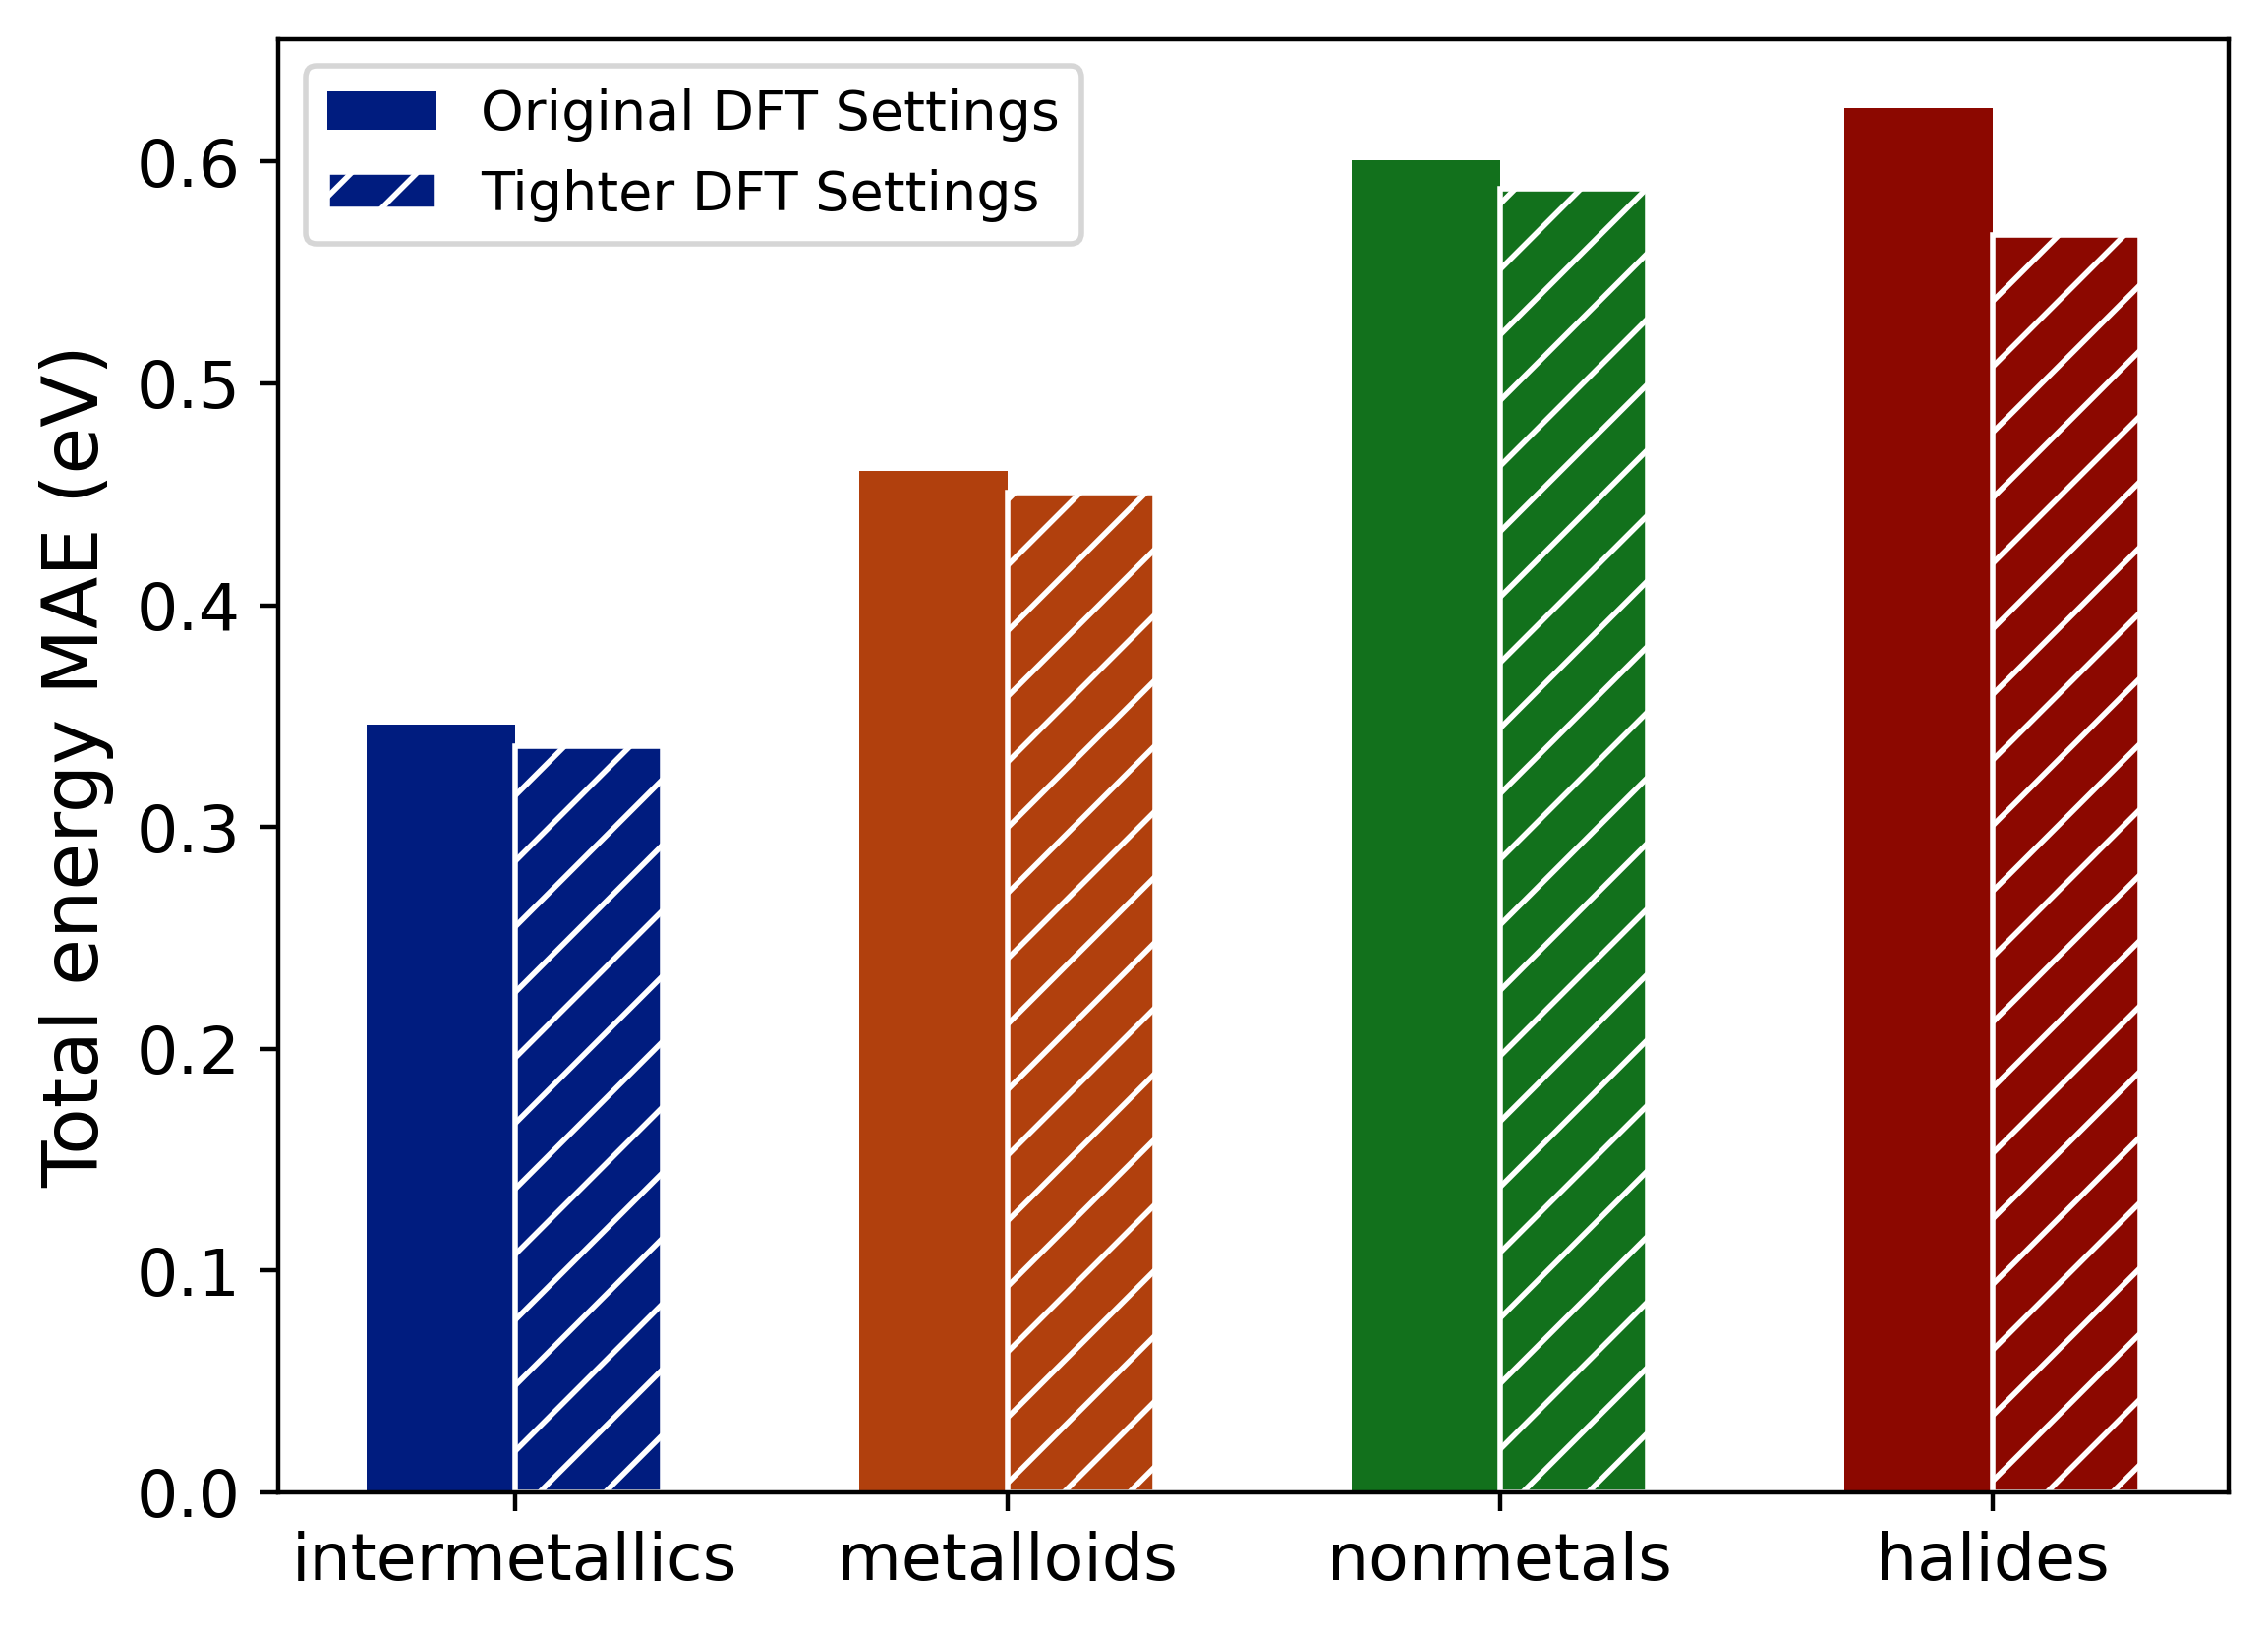

In [12]:
# Extract labels and mean values
# Define colors for different categories
colors = {'Intermetallics': '#001c7f', 'Metalloids': '#b1400d', 'Non-metals': '#12711c', 'Halides': '#8c0800'}
materials = ["intermetallics", "metalloids", "nonmetals", "halides"]
x = np.arange(len(materials))  # the label locations
width = 0.3  # the width of the bars

fig, ax = plt.subplots(dpi=400)

# Plotting the bars
ax.bar(x - width/2, list(energy_maes_old.values()), width, label='Original DFT Settings', color = colors.values())
ax.bar(x+ width/2, list(energy_maes_new.values()), width, label='Tighter DFT Settings', 
       color = colors.values(),edgecolor='white',hatch='//' )

# Add legend
ax.legend()
# Add labels and title
ax.set_ylabel('Total energy MAE (eV)',fontsize=14)
ax.set_xticks([0,1,2,3])
ax.set_xticks([0,1,2,3], materials)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);
# plt.xlabel("Material classes", fontsize=16);

In [13]:
## MAE 
ads_energy_maes_old = {"Intermetallics":np.mean(np.abs(df.query("cat_class==0")["old_ads_energy_ml_errors"])), 
              "Metalloids":np.mean(np.abs(df.query("cat_class==1")["old_ads_energy_ml_errors"])),
               "Non-metals":np.mean(np.abs(df.query("cat_class==2")["old_ads_energy_ml_errors"])),
               "Halides":np.mean(np.abs(df.query("cat_class==3")["old_ads_energy_ml_errors"])),
              }
## MAE 
ads_energy_maes_new = {"Intermetallics":np.mean(np.abs(df.query("cat_class==0")["new_ads_energy_ml_errors"])), 
              "Metalloids":np.mean(np.abs(df.query("cat_class==1")["new_ads_energy_ml_errors"])),
               "Non-metals":np.mean(np.abs(df.query("cat_class==2")["new_ads_energy_ml_errors"])),
               "Halides":np.mean(np.abs(df.query("cat_class==3")["new_ads_energy_ml_errors"])),}

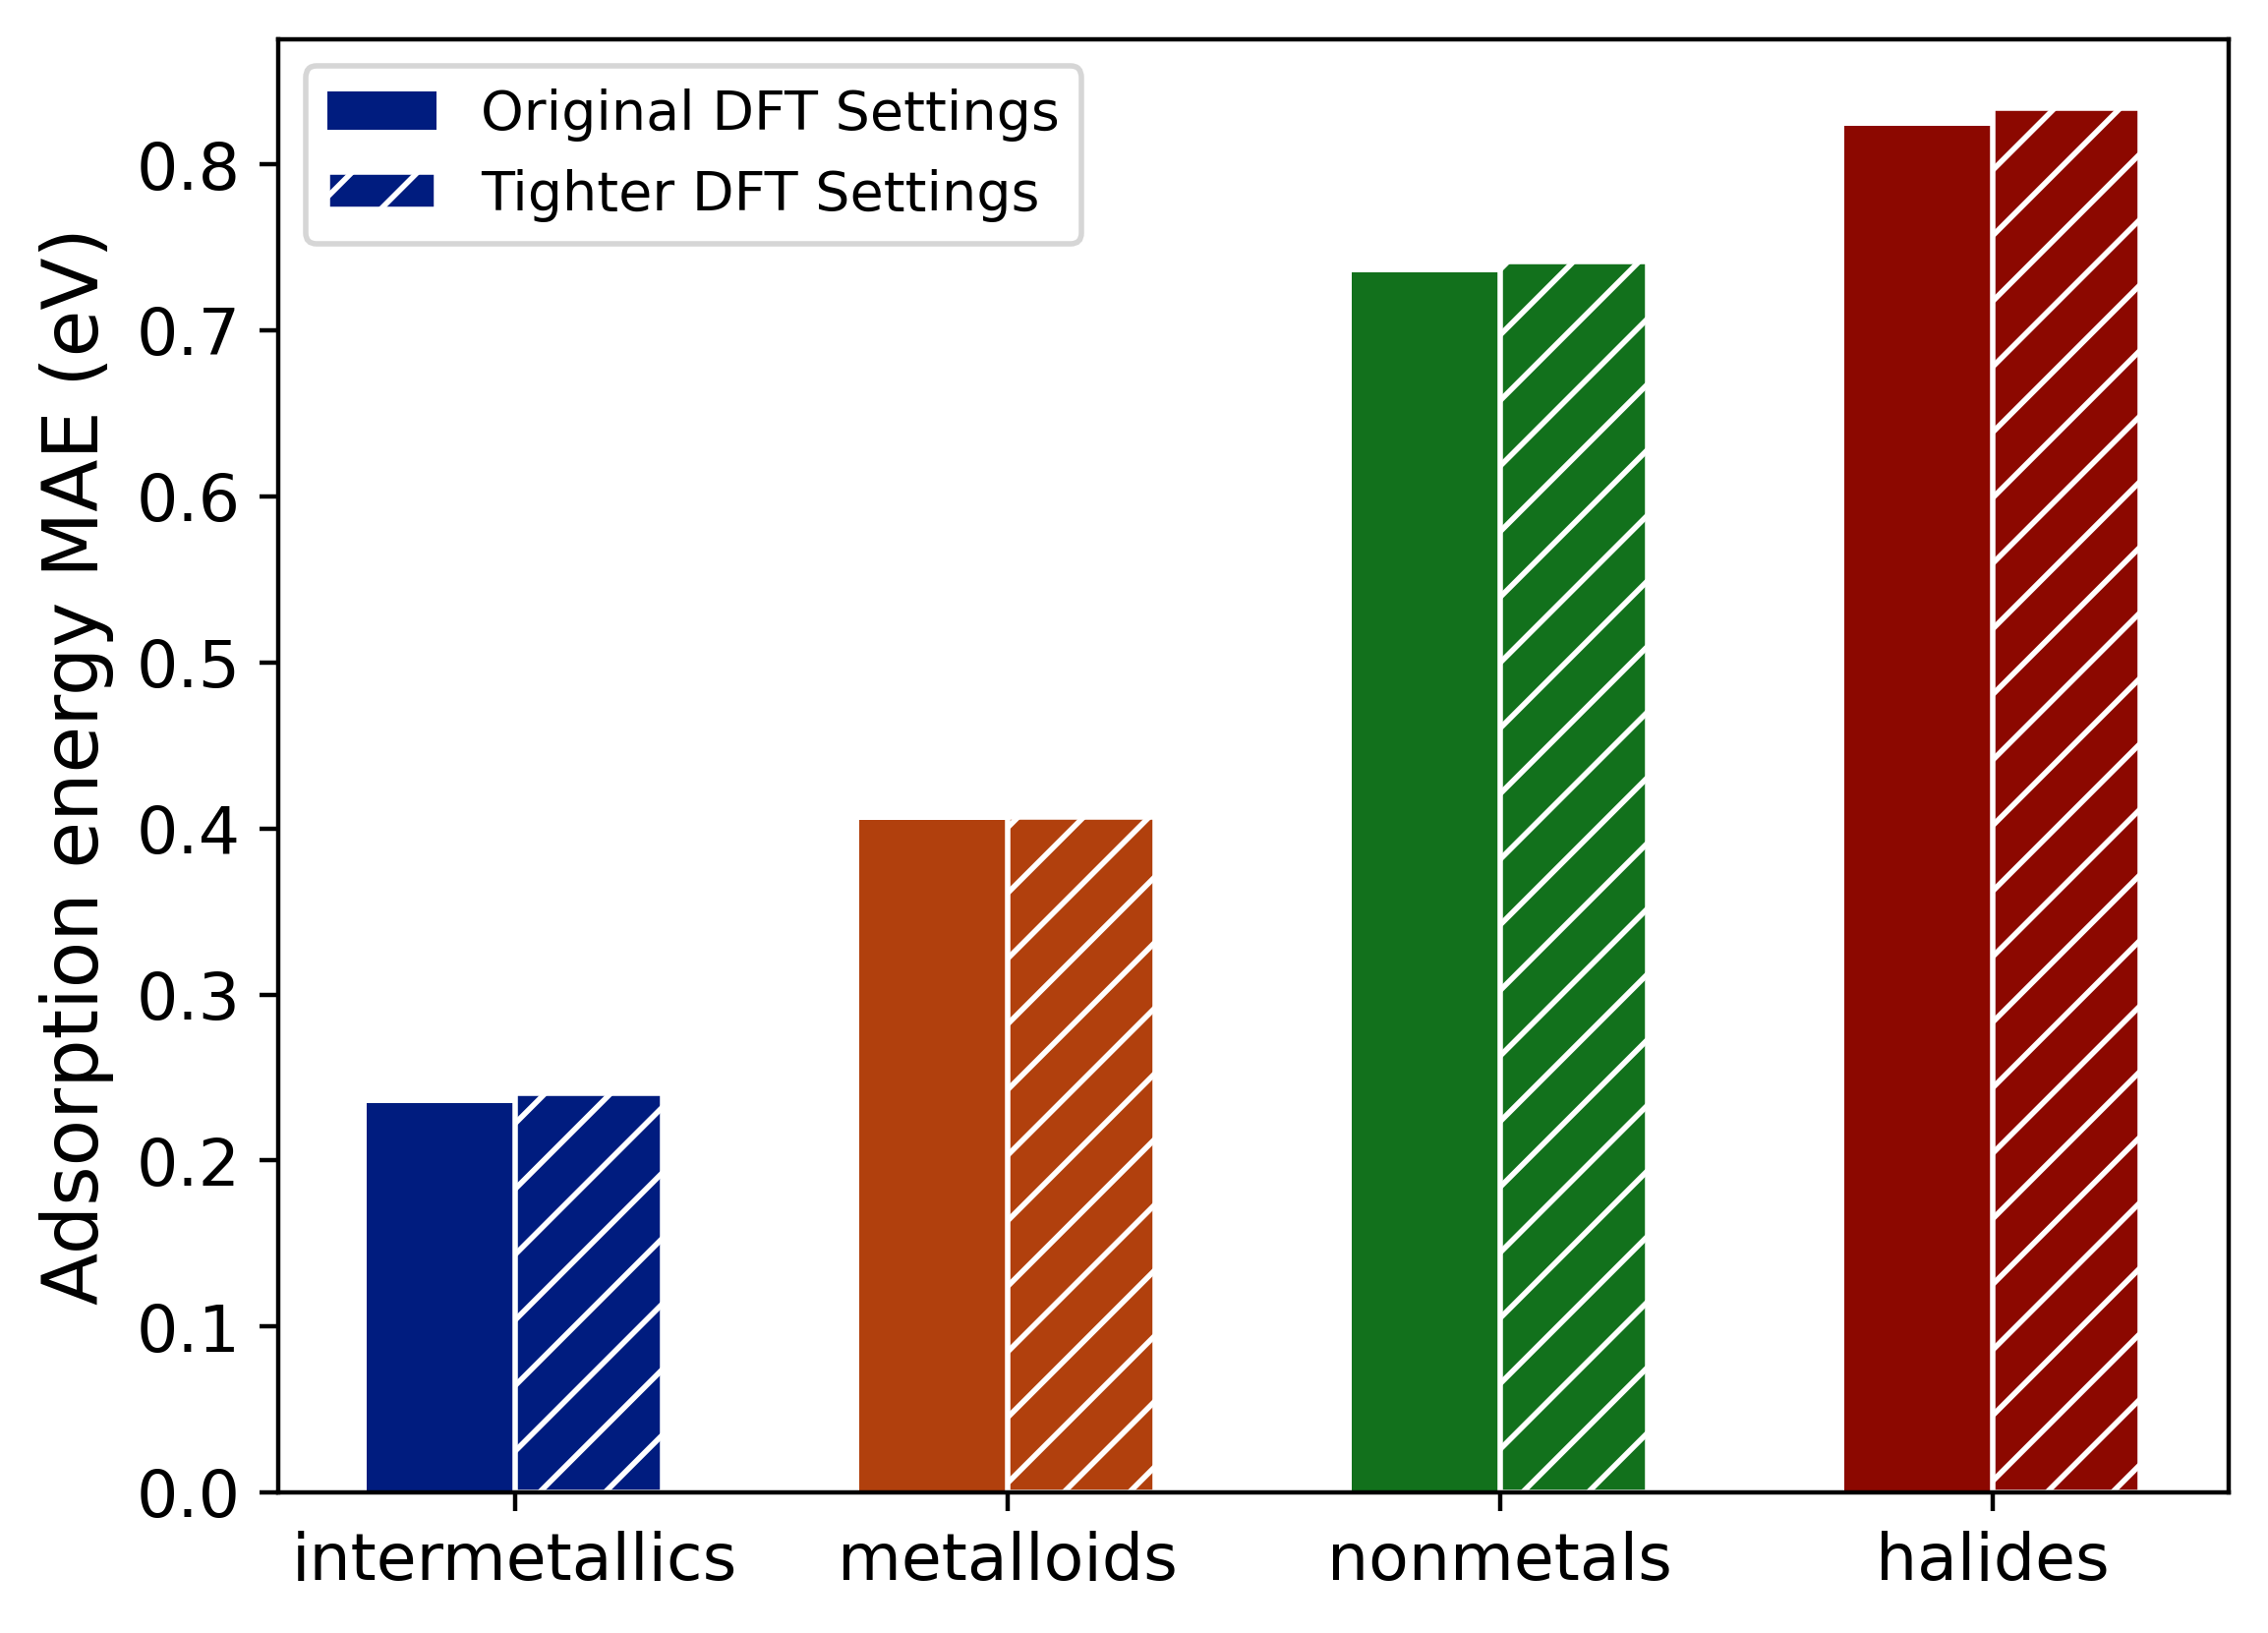

In [14]:
# Extract labels and mean values
# Define colors for different categories
colors = {'Intermetallics': '#001c7f', 'Metalloids': '#b1400d', 'Non-metals': '#12711c', 'Halides': '#8c0800'}
materials = ["intermetallics", "metalloids", "nonmetals", "halides"]
x = np.arange(len(materials))  # the label locations
width = 0.3  # the width of the bars

fig, ax = plt.subplots(dpi=400)

# Plotting the bars
ax.bar(x - width/2, list(ads_energy_maes_old.values()), width, label='Original DFT Settings', color = colors.values())
ax.bar(x+ width/2, list(ads_energy_maes_new.values()), width, label='Tighter DFT Settings', 
       color = colors.values(),edgecolor='white',hatch='//' )

# Add legend
ax.legend()
# Add labels and title
ax.set_ylabel('Adsorption energy MAE (eV)',fontsize=14)
ax.set_xticks([0,1,2,3])
ax.set_xticks([0,1,2,3], materials)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);
# plt.xlabel("Material classes", fontsize=16);